In [33]:
import numpy as np
import astropy.io.fits as fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from glob import glob
from astropy.visualization import ImageNormalize, ZScaleInterval

In [2]:
iris_fname = "../../src/IRIS/iris_l2_raster/iris_l2_20170821_081042_3620110460_raster_t000_r00019.fits"
with fits.open(iris_fname) as hdul:
    hdul.info()
    header = hdul[0].header

print('Window. Name      : wave start - wave end\n')
for ii in range(header['NWIN']):
    win = str(ii + 1)
    print('{0}. {1:15}: {2:.2f} - {3:.2f} Å'
          ''.format(win, header['TDESC' + win], header['TWMIN' + win], header['TWMAX' + win]))

Filename: ../../src/IRIS/iris_l2_raster/iris_l2_20170821_081042_3620110460_raster_t000_r00019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     380   ()      
  1                1 ImageHDU        33   (190, 548, 64)   int16 (rescales to float32)   
  2                1 ImageHDU        33   (125, 548, 64)   int16 (rescales to float32)   
  3                1 ImageHDU        33   (173, 548, 64)   int16 (rescales to float32)   
  4                1 ImageHDU        33   (209, 548, 64)   int16 (rescales to float32)   
  5                1 ImageHDU        33   (305, 548, 64)   int16 (rescales to float32)   
  6                1 ImageHDU        33   (59, 548, 64)   int16 (rescales to float32)   
  7                1 ImageHDU        33   (75, 548, 64)   int16 (rescales to float32)   
  8                1 ImageHDU        33   (268, 548, 64)   int16 (rescales to float32)   
  9                1 ImageHDU        54   (47, 64)   float64   
 10   

In [3]:
header["EXPTIME"]

14.9993

In [35]:
with fits.open(iris_fname) as hdul:
    FeXII_window = np.copy(hdul[2].data)
    MgII_window = np.copy(hdul[8].data)
    
    wcs_FeXII = WCS(hdul[2].header)
    m_to_ang = 1e10  # convert wavelength to nm
    nwave_FeXII = hdul[2].data.shape[2]
    wavelength_FeXII = wcs_FeXII.all_pix2world(np.arange(nwave_FeXII), [0.], [0.], 0)[0] * m_to_ang

    wcs_MgII = WCS(hdul[8].header)   
    nwave_MgII = hdul[8].data.shape[2] 
    wavelength_MgII = wcs_MgII.all_pix2world(np.arange(nwave_MgII), [0.], [0.], 0)[0] * m_to_ang
    header_FeXII = hdul[2].header

In [5]:
header_FeXII

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                  125 /                                                
NAXIS2  =                  548 /                                                
NAXIS3  =                   64 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
CDELT1  =      0.0259600002319 /                                                
CDELT2  =             0.332700 /                                                
CDELT3  =       0.997720203702 /                                                
CRPIX1  =              1.00000 /                                                
CRPIX2  =              274.5

In [6]:
FeXII_window.shape

(64, 548, 125)

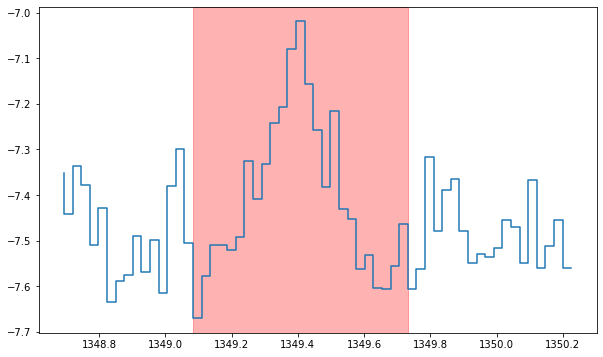

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.step(wavelength_FeXII[40:100],np.mean(FeXII_window[:,:,40:100],axis=(0,1)))
ax.axvspan(wavelength_FeXII[55],wavelength_FeXII[80],color="red",alpha=0.3)

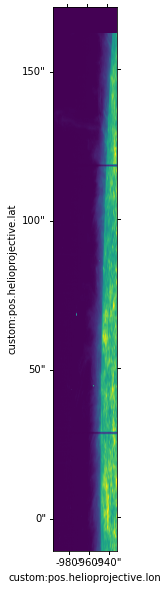

In [25]:
fig = plt.figure(figsize=(8,10))
ax= plt.subplot(projection=wcs_MgII.dropaxis(0), slices=('y', 'x'))
im = ax.imshow(np.sum(MgII_window[:,:,20:-20], axis=2).T,vmin=0)
#plt.colorbar(im)

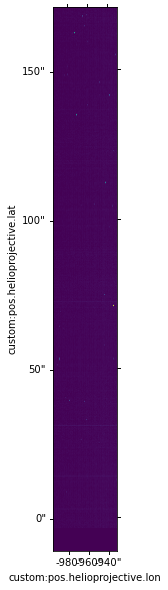

In [30]:
fig = plt.figure(figsize=(6,10))
ax= plt.subplot(projection=wcs_FeXII.dropaxis(0), slices=('y', 'x'))
im = ax.imshow(np.sum(FeXII_window[:,:,55:80], axis=2).T,vmin=-20)
#plt.colorbar(im)

In [28]:
iris_fnames = sorted(glob("../../src/IRIS/iris_l2_raster/*.fits"))
iris_FeXII_aver = np.zeros((64,548,125))
for iris_fname in iris_fnames:
    with fits.open(iris_fname) as hdul:
        iris_FeXII_aver += np.copy(hdul[2].data)

iris_FeXII_aver = iris_FeXII_aver/len(iris_fnames)

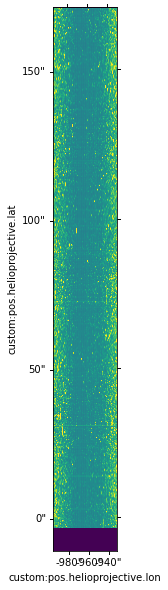

In [34]:
fig = plt.figure(figsize=(6,10))
ax= plt.subplot(projection=wcs_FeXII.dropaxis(0), slices=('y', 'x'))
norm = ImageNormalize(np.sum(iris_FeXII_aver[:,:,55:80], axis=2).T, interval=ZScaleInterval())
im = ax.imshow(np.sum(iris_FeXII_aver[:,:,55:80], axis=2).T,norm=norm)
#plt.colorbar(im)

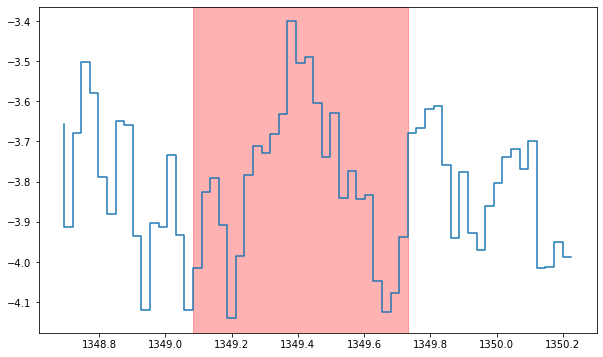

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.step(wavelength_FeXII[40:100],np.mean(iris_FeXII_aver[:,:,40:100],axis=(0,1)))
ax.axvspan(wavelength_FeXII[55],wavelength_FeXII[80],color="red",alpha=0.3)